In [1]:
import pandas as pd

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [3]:
train_data = pd.read_csv("train_b1.csv")

C:\Users\vedpi\AppData\Local\Temp\ipykernel_20012\2453959840.py:1: DtypeWarning: Columns (24,25,26,39,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("train_b1.csv")


In [4]:
test_data = pd.read_csv("test_b1.csv")

C:\Users\vedpi\AppData\Local\Temp\ipykernel_20012\446628293.py:1: DtypeWarning: Columns (24,26,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv("test_b1.csv")


In [5]:
test_data.head()

,Env,Hybrid,Year,Field_Location,Experiment,Replicate,Block,Plot,Range,Pass,Hybrid_orig_name,Hybrid_Parent2,Plot_Area_ha,Date_Planted,Date_Harvested,Stand_Count_plants,Pollen_DAP_days,Silk_DAP_days,Plant_Height_cm,Ear_Height_cm,Root_Lodging_plants,Stalk_Lodging_plants,Grain_Moisture,Twt_kg_m3,Previous_Crop,Type_of_planter (fluted cone; belt cone; air planter),Pounds_Needed_Soil_Moisture,Experiment_Code,Weather_Station_Latitude (in decimal numbers NOT DMS),Latitude_of_Field_Corner_#2 (lower right),Longitude_of_Field_Corner_#4 (upper left),Latitude_of_Field_Corner_#4 (upper left),Longitude_of_Field_Corner_#2 (lower right),Latitude_of_Field_Corner_#1 (lower left),Weather_Station_Longitude (in decimal numbers NOT DMS),Longitude_of_Field_Corner_#1 (lower left),Longitude_of_Field_Corner_#3 (upper right),Latitude_of_Field_Corner_#3 (upper right),City,Treatment,%K Sat,Calcium ppm Ca,%Ca Sat,%Na Sat,Sulfate-S ppm S,E Depth,%H Sat,1:1 S Salts mmho/cm,Organic Matter LOI %,% Clay,lbs N/A,WDRF Buffer pH,% Silt,Nitrate-N ppm N,Magnesium ppm Mg,%Mg Sat,Potassium ppm K,1:1 Soil pH,Mehlich P-III ppm P,% Sand,Texture,Texture No,LabID,CEC/Sum of Cations me/100g,Sodium ppm Na,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DWN,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR,PS,QV2M,RH2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,WS2M,SDR_pGerEme_1,SDR_pEmeEnJ_1,SDR_pEnJFlo_1,SDR_pFloFla_1,SDR_pFlaFlw_1,SDR_pFlwStG_1,SDR_pStGEnG_1,SDR_pEnGMat_1,SDR_pMatHar_1,SDR_pGerEme_2,SDR_pEmeEnJ_2,SDR_pEnJFlo_2,SDR_pFloFla_2,SDR_pFlaFlw_2,SDR_pFlwStG_2,SDR_pStGEnG_2,SDR_pEnGMat_2,SDR_pMatHar_2,SDR_pGerEme_3,SDR_pEmeEnJ_3,SDR_pEnJFlo_3,SDR_pFloFla_3,SDR_pFlaFlw_3,SDR_pFlwStG_3,SDR_pStGEnG_3,SDR_pEnGMat_3,SDR_pMatHar_3,SDR_pGerEme_4,SDR_pEmeEnJ_4,SDR_pEnJFlo_4,SDR_pFloFla_4,SDR_pFlaFlw_4,SDR_pFlwStG_4,SDR_pStGEnG_4,SDR_pEnGMat_4,SDR_pMatHar_4,SDR_pGerEme_5,SDR_pEmeEnJ_5,SDR_pEnJFlo_5,SDR_pFloFla_5,SDR_pFlaFlw_5,SDR_pFlwStG_5,SDR_pStGEnG_5,SDR_pEnGMat_5,SDR_pMatHar_5,SDR_pGerEme_6,SDR_pEmeEnJ_6,SDR_pEnJFlo_6,SDR_pFloFla_6,SDR_pFlaFlw_6,SDR_pFlwStG_6,SDR_pStGEnG_6,SDR_pEnGMat_6,SDR_pMatHar_6,SDR_pGerEme_7,SDR_pEmeEnJ_7,SDR_pEnJFlo_7,SDR_pFloFla_7,SDR_pFlaFlw_7,SDR_pFlwStG_7,SDR_pStGEnG_7,SDR_pEnGMat_7,SDR_pMatHar_7,SDR_pGerEme_8,SDR_pEmeEnJ_8,SDR_pEnJFlo_8,SDR_pFloFla_8,SDR_pFlaFlw_8,SDR_pFlwStG_8,SDR_pStGEnG_8,SDR_pEnGMat_8,SDR_pMatHar_8,SDR_pGerEme_9,SDR_pEmeEnJ_9,SDR_pEnJFlo_9,SDR_pFloFla_9,SDR_pFlaFlw_9,SDR_pFlwStG_9,SDR_pStGEnG_9,SDR_pEnGMat_9,SDR_pMatHar_9,SDR_pGerEme_10,SDR_pEmeEnJ_10,SDR_pEnJFlo_10,SDR_pFloFla_10,SDR_pFlaFlw_10,SDR_pFlwStG_10,SDR_pStGEnG_10,SDR_pEnGMat_10,SDR_pMatHar_10,TT_pGerEme,TT_pEmeEnJ,TT_pEnJFlo,TT_pFloFla,TT_pFlaFlw,TT_pFlwStG,TT_pStGEnG,TT_pEnGMat,TT_pMatHar,biomass_pGerEme,biomass_pEmeEnJ,biomass_pEnJFlo,biomass_pFloFla,biomass_pFlaFlw,biomass_pFlwStG,biomass_pStGEnG,biomass_pEnGMat,biomass_pMatHar,yield_pGerEme,yield_pEmeEnJ,yield_pEnJFlo,yield_pFloFla,yield_pFlaFlw,yield_pFlwStG,yield_pStGEnG,yield_pEnGMat,yield_pMatHar,Eo_pGerEme,Eo_pEmeEnJ,Eo_pEnJFlo,Eo_pFloFla,Eo_pFlaFlw,Eo_pFlwStG,Eo_pStGEnG,Eo_pEnGMat,Eo_pMatHar,Eos_pGerEme,Eos_pEmeEnJ,Eos_pEnJFlo,Eos_pFloFla,Eos_pFlaFlw,Eos_pFlwStG,Eos_pStGEnG,Eos_pEnGMat,Eos_pMatHar,Es_pGerEme,Es_pEmeEnJ,Es_pEnJFlo,Es_pFloFla,Es_pFlaFlw,Es_pFlwStG,Es_pStGEnG,Es_pEnGMat,Es_pMatHar,ESW_pGerEme_1,ESW_pEmeEnJ_1,ESW_pEnJFlo_1,ESW_pFloFla_1,ESW_pFlaFlw_1,ESW_pFlwStG_1,ESW_pStGEnG_1,ESW_pEnGMat_1,ESW_pMatHar_1,ESW_pGerEme_2,ESW_pEmeEnJ_2,ESW_pEnJFlo_2,ESW_pFloFla_2,ESW_pFlaFlw_2,ESW_pFlwStG_2,ESW_pStGEnG_2,ESW_pEnGMat_2,ESW_pMatHar_2,ESW_pGerEme_3,ESW_pEmeEnJ_3,ESW_pEnJFlo_3,ESW_pFloFla_3,ESW_pFlaFlw_3,ESW_pFlwStG_3,ESW_pStGEnG_3,ESW_pEnGMat_3,ESW_pMatHar_3,ESW_pGerEme_4,ESW_pEmeEnJ_4,ESW_pEnJFlo_4,ESW_pFloFla_4,ESW_pFlaFlw_4,ESW_pFlwStG_4,ESW_pStGEnG_4,ESW_pEnGMat_4,ESW_pMatHar_4,ESW_pGerEme_5,ESW_pEmeEnJ_5,ESW_pEnJFlo_5,ESW_pFloFla_5,ESW_pFlaFlw_5,ESW_pFlwStG_5,ESW_pStGEnG_5,ESW_pEnGMat_5,ESW_pMatHar_5,ESW_pGerEme_6,ESW_pEmeEnJ_6,ESW_pEnJFlo_6,ESW_pFloFla_6,ESW_pFlaFlw_6,ESW_pFlwStG_6,ESW_pStGEnG_6,ESW_pEnGM

In [6]:
test_data["Field_Location"] = test_data["Env"].map(lambda x: x.split("_")[0])

In [7]:
valid_data = pd.read_csv("valid_b1.csv")

C:\Users\vedpi\AppData\Local\Temp\ipykernel_20012\383023486.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  valid_data = pd.read_csv("valid_b1.csv")


In [8]:
train_target = pd.read_csv("train_b1_target.csv")

In [9]:
valid_target = pd.read_csv("valid_b1_target.csv")

In [10]:
test_target = pd.read_csv("test_b1_target.csv")

In [11]:
trait_cols = pd.read_csv("trait_cols.csv")

In [12]:
meta_cols = pd.read_csv("meta_cols.csv")

In [13]:
meta_cols = pd.DataFrame(list(set(meta_cols.iloc[:,0].values).difference(["Year", "Env"])))

In [14]:
soil_columns = pd.read_csv("soil_columns.csv")

In [15]:
soil_columns = pd.DataFrame(list(set(soil_columns.iloc[:,0].values).difference(["Year", "Env"])))

In [16]:
weather_cols = pd.read_csv("weather_cols.csv")

In [17]:
weather_cols = pd.DataFrame(list(set(weather_cols.iloc[:,0].values).difference(["Year", "Env"])))

In [18]:
EC_cols = pd.read_csv("EC_cols.csv")

In [19]:
EC_cols = pd.DataFrame(list(set(EC_cols.iloc[:,0].values).difference(["Year", "Env"])))

In [20]:
hybrid_cols = pd.read_csv("hybrid_cols.csv")

In [21]:
hybrid_cols = pd.DataFrame(list(set(hybrid_cols.iloc[:,0].values).difference(["Year", "Env"])))

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [23]:
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [24]:
cat_cols = train_data.columns[train_data.dtypes == object].tolist()

In [25]:
num_cols = train_data.columns[train_data.dtypes != object].tolist()

In [26]:
num_cols = [col for col in num_cols if col != "Year"]

In [27]:
train_data.head()

,Env,Hybrid,Year,Field_Location,Experiment,Replicate,Block,Plot,Range,Pass,Hybrid_orig_name,Hybrid_Parent2,Plot_Area_ha,Date_Planted,Date_Harvested,Stand_Count_plants,Pollen_DAP_days,Silk_DAP_days,Plant_Height_cm,Ear_Height_cm,Root_Lodging_plants,Stalk_Lodging_plants,Grain_Moisture,Twt_kg_m3,Previous_Crop,Type_of_planter (fluted cone; belt cone; air planter),Pounds_Needed_Soil_Moisture,Experiment_Code,Weather_Station_Latitude (in decimal numbers NOT DMS),Latitude_of_Field_Corner_#2 (lower right),Longitude_of_Field_Corner_#4 (upper left),Latitude_of_Field_Corner_#4 (upper left),Longitude_of_Field_Corner_#2 (lower right),Latitude_of_Field_Corner_#1 (lower left),Weather_Station_Longitude (in decimal numbers NOT DMS),Longitude_of_Field_Corner_#1 (lower left),Longitude_of_Field_Corner_#3 (upper right),Latitude_of_Field_Corner_#3 (upper right),City,Treatment,%K Sat,Calcium ppm Ca,%Ca Sat,%Na Sat,Sulfate-S ppm S,E Depth,%H Sat,1:1 S Salts mmho/cm,Organic Matter LOI %,% Clay,lbs N/A,WDRF Buffer pH,% Silt,Nitrate-N ppm N,Magnesium ppm Mg,%Mg Sat,Potassium ppm K,1:1 Soil pH,Mehlich P-III ppm P,% Sand,Texture,Texture No,LabID,CEC/Sum of Cations me/100g,Sodium ppm Na,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DWN,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR,PS,QV2M,RH2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,WS2M,SDR_pGerEme_1,SDR_pEmeEnJ_1,SDR_pEnJFlo_1,SDR_pFloFla_1,SDR_pFlaFlw_1,SDR_pFlwStG_1,SDR_pStGEnG_1,SDR_pEnGMat_1,SDR_pMatHar_1,SDR_pGerEme_2,SDR_pEmeEnJ_2,SDR_pEnJFlo_2,SDR_pFloFla_2,SDR_pFlaFlw_2,SDR_pFlwStG_2,SDR_pStGEnG_2,SDR_pEnGMat_2,SDR_pMatHar_2,SDR_pGerEme_3,SDR_pEmeEnJ_3,SDR_pEnJFlo_3,SDR_pFloFla_3,SDR_pFlaFlw_3,SDR_pFlwStG_3,SDR_pStGEnG_3,SDR_pEnGMat_3,SDR_pMatHar_3,SDR_pGerEme_4,SDR_pEmeEnJ_4,SDR_pEnJFlo_4,SDR_pFloFla_4,SDR_pFlaFlw_4,SDR_pFlwStG_4,SDR_pStGEnG_4,SDR_pEnGMat_4,SDR_pMatHar_4,SDR_pGerEme_5,SDR_pEmeEnJ_5,SDR_pEnJFlo_5,SDR_pFloFla_5,SDR_pFlaFlw_5,SDR_pFlwStG_5,SDR_pStGEnG_5,SDR_pEnGMat_5,SDR_pMatHar_5,SDR_pGerEme_6,SDR_pEmeEnJ_6,SDR_pEnJFlo_6,SDR_pFloFla_6,SDR_pFlaFlw_6,SDR_pFlwStG_6,SDR_pStGEnG_6,SDR_pEnGMat_6,SDR_pMatHar_6,SDR_pGerEme_7,SDR_pEmeEnJ_7,SDR_pEnJFlo_7,SDR_pFloFla_7,SDR_pFlaFlw_7,SDR_pFlwStG_7,SDR_pStGEnG_7,SDR_pEnGMat_7,SDR_pMatHar_7,SDR_pGerEme_8,SDR_pEmeEnJ_8,SDR_pEnJFlo_8,SDR_pFloFla_8,SDR_pFlaFlw_8,SDR_pFlwStG_8,SDR_pStGEnG_8,SDR_pEnGMat_8,SDR_pMatHar_8,SDR_pGerEme_9,SDR_pEmeEnJ_9,SDR_pEnJFlo_9,SDR_pFloFla_9,SDR_pFlaFlw_9,SDR_pFlwStG_9,SDR_pStGEnG_9,SDR_pEnGMat_9,SDR_pMatHar_9,SDR_pGerEme_10,SDR_pEmeEnJ_10,SDR_pEnJFlo_10,SDR_pFloFla_10,SDR_pFlaFlw_10,SDR_pFlwStG_10,SDR_pStGEnG_10,SDR_pEnGMat_10,SDR_pMatHar_10,TT_pGerEme,TT_pEmeEnJ,TT_pEnJFlo,TT_pFloFla,TT_pFlaFlw,TT_pFlwStG,TT_pStGEnG,TT_pEnGMat,TT_pMatHar,biomass_pGerEme,biomass_pEmeEnJ,biomass_pEnJFlo,biomass_pFloFla,biomass_pFlaFlw,biomass_pFlwStG,biomass_pStGEnG,biomass_pEnGMat,biomass_pMatHar,yield_pGerEme,yield_pEmeEnJ,yield_pEnJFlo,yield_pFloFla,yield_pFlaFlw,yield_pFlwStG,yield_pStGEnG,yield_pEnGMat,yield_pMatHar,Eo_pGerEme,Eo_pEmeEnJ,Eo_pEnJFlo,Eo_pFloFla,Eo_pFlaFlw,Eo_pFlwStG,Eo_pStGEnG,Eo_pEnGMat,Eo_pMatHar,Eos_pGerEme,Eos_pEmeEnJ,Eos_pEnJFlo,Eos_pFloFla,Eos_pFlaFlw,Eos_pFlwStG,Eos_pStGEnG,Eos_pEnGMat,Eos_pMatHar,Es_pGerEme,Es_pEmeEnJ,Es_pEnJFlo,Es_pFloFla,Es_pFlaFlw,Es_pFlwStG,Es_pStGEnG,Es_pEnGMat,Es_pMatHar,ESW_pGerEme_1,ESW_pEmeEnJ_1,ESW_pEnJFlo_1,ESW_pFloFla_1,ESW_pFlaFlw_1,ESW_pFlwStG_1,ESW_pStGEnG_1,ESW_pEnGMat_1,ESW_pMatHar_1,ESW_pGerEme_2,ESW_pEmeEnJ_2,ESW_pEnJFlo_2,ESW_pFloFla_2,ESW_pFlaFlw_2,ESW_pFlwStG_2,ESW_pStGEnG_2,ESW_pEnGMat_2,ESW_pMatHar_2,ESW_pGerEme_3,ESW_pEmeEnJ_3,ESW_pEnJFlo_3,ESW_pFloFla_3,ESW_pFlaFlw_3,ESW_pFlwStG_3,ESW_pStGEnG_3,ESW_pEnGMat_3,ESW_pMatHar_3,ESW_pGerEme_4,ESW_pEmeEnJ_4,ESW_pEnJFlo_4,ESW_pFloFla_4,ESW_pFlaFlw_4,ESW_pFlwStG_4,ESW_pStGEnG_4,ESW_pEnGMat_4,ESW_pMatHar_4,ESW_pGerEme_5,ESW_pEmeEnJ_5,ESW_pEnJFlo_5,ESW_pFloFla_5,ESW_pFlaFlw_5,ESW_pFlwStG_5,ESW_pStGEnG_5,ESW_pEnGMat_5,ESW_pMatHar_5,ESW_pGerEme_6,ESW_pEmeEnJ_6,ESW_pEnJFlo_6,ESW_pFloFla_6,ESW_pFlaFlw_6,ESW_pFlwStG_6,ESW_pStGEnG_6,ESW_pEnGM

In [28]:
train_data[cat_cols].nunique()

Env                                                       190
Hybrid                                                   4506
Field_Location                                             45
Experiment                                                 11
Hybrid_orig_name                                         4746
Hybrid_Parent2                                             73
Date_Planted                                              140
Date_Harvested                                            209
Previous_Crop                                               4
Type_of_planter (fluted cone; belt cone; air planter)       4
Pounds_Needed_Soil_Moisture                                35
Experiment_Code                                            45
City                                                       42
Treatment                                                   2
Texture                                                    10
LabID                                                       4
dtype: i

In [29]:
not_these_cat = ["Hybrid_orig_name", "Hybrid_Parent1", "Date_Planted", "Date_Harvested", "Hybrid", "Env"]

In [30]:
cat_cols = list(set(cat_cols).difference(not_these_cat))

In [31]:
categorical_transformer.fit(train_data[cat_cols].values.astype(str))

OneHotEncoder(handle_unknown='ignore')

In [32]:
transformed_cat_cols = categorical_transformer.get_feature_names_out(cat_cols)

In [33]:
# transformed_cat_cols

In [34]:
train_data_cat = categorical_transformer.transform(train_data[cat_cols].values).toarray()

In [35]:
train_data_cat = pd.DataFrame(train_data_cat) 

In [36]:
train_data_cat.columns = transformed_cat_cols

In [37]:
valid_data_cat = categorical_transformer.transform(valid_data[cat_cols].values).toarray()

In [38]:
valid_data_cat = pd.DataFrame(valid_data_cat) 

In [39]:
valid_data_cat.columns = transformed_cat_cols

In [40]:
test_data_cat = categorical_transformer.transform(test_data[cat_cols].values).toarray()

In [41]:
test_data_cat = pd.DataFrame(test_data_cat) 

In [42]:
test_data_cat.columns = transformed_cat_cols

In [43]:
from sklearn.impute import SimpleImputer

In [44]:
si = SimpleImputer()

In [45]:
si.fit(train_data[num_cols])

SimpleImputer()

In [46]:
train_data_num = si.transform(train_data[num_cols].values)

C:\Users\vedpi\.conda\envs\newone1\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [47]:
train_data_num = pd.DataFrame(train_data_num)

In [48]:
train_data_num.columns = num_cols

In [49]:
valid_data_num = si.transform(valid_data[num_cols].values)

C:\Users\vedpi\.conda\envs\newone1\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [50]:
valid_data_num = pd.DataFrame(valid_data_num)

In [51]:
valid_data_num.columns = num_cols

In [52]:
test_data_num = si.transform(test_data[num_cols].values)

C:\Users\vedpi\.conda\envs\newone1\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [53]:
test_data_num = pd.DataFrame(test_data_num)

In [54]:
test_data_num.columns = num_cols

In [55]:
cat_cols

['Field_Location',
 'Hybrid_Parent2',
 'LabID',
 'Experiment',
 'Experiment_Code',
 'Pounds_Needed_Soil_Moisture',
 'Treatment',
 'Previous_Crop',
 'Type_of_planter (fluted cone; belt cone; air planter)',
 'City',
 'Texture']

In [56]:
catch = []
for col in cat_cols: 
#     print(col)
#     print([col1 for col1 in transformed_cat_cols if col in col1])
    dict1 = {col: [col1 for col1 in transformed_cat_cols if col in col1]}
    if col == "Experiment": 
        dict1 = {col: [col1 for col1 in transformed_cat_cols if col in col1 if "Code" not in col1]}
#     print([col1 for col1 in transformed_cat_cols if col in col1])    
    catch.append(dict1)

In [57]:
train_trait_num_cols = set(trait_cols.iloc[:,0].values).intersection(num_cols)

In [58]:
meta_num_cols = set(meta_cols.iloc[:,0].values).intersection(num_cols)

In [59]:
EC_num_cols = set(EC_cols.iloc[:,0].values).intersection(num_cols)

In [60]:
soil_num_cols = set(soil_columns.iloc[:,0].values).intersection(num_cols)

In [61]:
hybrid_num_cols = set(hybrid_cols.iloc[:,0].values).intersection(num_cols)

In [62]:
weather_num_cols = set(weather_cols.iloc[:,0].values).intersection(num_cols)

In [63]:
# hybrid_num_cols = set(hybrid_cols).intersection(num_cols)

In [64]:
trait_cat_cols = []
meta_cat_cols = []
weather_cat_cols = []
EC_cat_cols = []
soil_cat_cols = []
for item in catch:
    if list(item.keys())[0] in trait_cols.values:
#         if item != "Experiment_Code"
#         print(item.keys())
#         print(list(item.values())[0])
        trait_cat_cols.append(list(item.values())[0])
    if list(item.keys())[0] in meta_cols.values:
#         print(item.keys())
        meta_cat_cols.append(list(item.values())[0])   
    if list(item.keys())[0] in weather_cols.values:
        weather_cat_cols.append(list(item.values())[0])
        print(item.keys())
    if list(item.keys())[0] in soil_columns.values:
        soil_cat_cols.append(list(item.values())[0])
#         print(item.keys())
    if list(item.keys())[0] in EC_cols.values:
        EC_cat_cols.append(list(item.values())[0])
        print(item.keys())
        

In [65]:
trait_cat_cols = [inner for item in trait_cat_cols for inner in item]

In [66]:
meta_cat_cols = [inner for item in meta_cat_cols for inner in item]

In [67]:
weather_cat_cols = [inner for item in weather_cat_cols for inner in item]

In [68]:
EC_cat_cols = [inner for item in EC_cat_cols for inner in item]

In [69]:
soil_cat_cols = [inner for item in soil_cat_cols for inner in item]

In [70]:
soil_cat_cols

['LabID_Local Lab',
 'LabID_Soil & Forage Analysis Lab',
 'LabID_UW Soil & Plant Analysis Lab',
 'LabID_Ward Laboratories Inc',
 'LabID_nan',
 'Texture_Clay',
 'Texture_Clay Loam',
 'Texture_Loam',
 'Texture_Loamy Sand',
 'Texture_Sandy Clay Loam',
 'Texture_Sandy Loam',
 'Texture_Silt Loam',
 'Texture_Silt Loam-Silty Clay Loam',
 'Texture_Silty Clay',
 'Texture_Silty Clay Loam',
 'Texture_nan']

In [71]:
### train 
train_trait_cat = train_data_cat[trait_cat_cols]
train_meta_cat = train_data_cat[meta_cat_cols]
train_weather_cat = train_data_cat[weather_cat_cols]
train_EC_cat = train_data_cat[EC_cat_cols]
train_soil_cat = train_data_cat[soil_cat_cols]

In [72]:
### valid 
valid_trait_cat = valid_data_cat[trait_cat_cols]
valid_meta_cat = valid_data_cat[meta_cat_cols]
valid_weather_cat = valid_data_cat[weather_cat_cols]
valid_EC_cat = valid_data_cat[EC_cat_cols]
valid_soil_cat = valid_data_cat[soil_cat_cols]

In [73]:
### test
test_meta_cat = test_data_cat[meta_cat_cols]
test_weather_cat = test_data_cat[weather_cat_cols]
test_EC_cat = test_data_cat[EC_cat_cols]
test_soil_cat = test_data_cat[soil_cat_cols]

In [74]:
### numeric 
train_trait_num = train_data_num[list(train_trait_num_cols)]
train_meta_num  = train_data_num[list(meta_num_cols)]
train_weather_num  = train_data_num[list(weather_num_cols)]
train_EC_num  = train_data_num[list(EC_num_cols)]
train_soil_num  = train_data_num[list(soil_num_cols)]
train_hybrid_num = train_data_num[hybrid_cols.iloc[:,0].values.tolist()]

In [75]:
### valid 
### numeric 
valid_trait_num = valid_data_num[list(train_trait_num_cols)]
valid_meta_num  = valid_data_num[list(meta_num_cols)]
valid_weather_num  = valid_data_num[list(weather_num_cols)]
valid_EC_num  = valid_data_num[list(EC_num_cols)]
valid_soil_num  = valid_data_num[list(soil_num_cols)]
valid_hybrid_num = valid_data_num[hybrid_cols.iloc[:,0].values.tolist()]

In [76]:
### test
### numeric 
# train_trait_num = train_data_num[list(train_trait_num_cols)]
test_meta_num  = test_data_num[list(meta_num_cols)]
test_weather_num  = test_data_num[list(weather_num_cols)]
test_EC_num  = test_data_num[list(EC_num_cols)]
test_soil_num  = test_data_num[list(soil_num_cols)]
test_hybrid_num = test_data_num[hybrid_cols.iloc[:,0].values.tolist()]

In [77]:
# train_trait_cat

In [78]:
train_meta_num.shape

(108590, 10)

In [79]:
train_meta_cat.shape

(108590, 136)

In [80]:
import tensorflow as tf

In [81]:
inp_meta_num1 = tf.keras.layers.Input(shape = (train_meta_num.shape[1]),name = "meta_num")
inp_meta_num = tf.keras.layers.Normalization()(inp_meta_num1)
inp_weather_num1 = tf.keras.layers.Input(shape = (train_weather_num.shape[1]),name = "weather_num")
inp_weather_num = tf.keras.layers.Normalization()(inp_weather_num1)
inp_EC_num1 = tf.keras.layers.Input(shape = (train_EC_num.shape[1]),name = "EC_num")
inp_EC_num = tf.keras.layers.Normalization()(inp_EC_num1)
inp_soil_num1 = tf.keras.layers.Input(shape = (train_soil_num.shape[1]),name = "soil_num")
inp_soil_num = tf.keras.layers.Normalization()(inp_soil_num1)
inp_trait_num1 = tf.keras.layers.Input(shape = (train_trait_num.shape[1]),name = "trait_num")
inp_trait_num = tf.keras.layers.Normalization()(inp_trait_num1)
inp_hybrid_num1 = tf.keras.layers.Input(shape = (train_hybrid_num.shape[1]),name = "hybrid_num")
inp_hybrid_num = tf.keras.layers.Normalization()(inp_hybrid_num1)

In [82]:
inp_meta_cat1 = tf.keras.layers.Input(shape = (train_meta_cat.shape[1]),name = "meta_cat")
inp_meta_cat = tf.keras.layers.Normalization()(inp_meta_cat1)
inp_soil_cat1 = tf.keras.layers.Input(shape = (train_soil_cat.shape[1]),name = "soil_cat")
inp_soil_cat = tf.keras.layers.Normalization()(inp_soil_cat1)
inp_trait_cat1 = tf.keras.layers.Input(shape = (train_trait_cat.shape[1]),name = "trait_cat")
inp_trait_cat = tf.keras.layers.Normalization()(inp_trait_cat1)

In [83]:
inp_meta_num

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'normalization')>

In [84]:
dense_meta_num = tf.keras.layers.Dense(inp_meta_num.get_shape()[1]//2)(inp_meta_num)

In [85]:
dense_weather_num = tf.keras.layers.Dense(inp_weather_num.get_shape()[1]//2)(inp_weather_num)

In [86]:
dense_EC_num = tf.keras.layers.Dense(inp_EC_num.get_shape()[1]//16, kernel_regularizer=tf.keras.regularizers.L1L2())(inp_EC_num)

In [87]:
dense_EC_num

<KerasTensor: shape=(None, 47) dtype=float32 (created by layer 'dense_2')>

In [88]:
dense_soil_num = tf.keras.layers.Dense(inp_soil_num.get_shape()[1]//2)(inp_soil_num)

In [89]:
dense_trait_num = tf.keras.layers.Dense(inp_trait_num.get_shape()[1]//2)(inp_trait_num)

In [90]:
dense_hybrid_num = tf.keras.layers.Dense(inp_hybrid_num.get_shape()[1]//6, kernel_regularizer=tf.keras.regularizers.L1L2())(inp_hybrid_num)

In [91]:
dense_hybrid_num

<KerasTensor: shape=(None, 66) dtype=float32 (created by layer 'dense_5')>

In [92]:
dense_meta_cat = tf.keras.layers.Dense(inp_meta_cat.get_shape()[1]//2, kernel_regularizer=tf.keras.regularizers.L1L2())(inp_meta_cat)

In [93]:
dense_meta_cat

<KerasTensor: shape=(None, 68) dtype=float32 (created by layer 'dense_6')>

In [94]:
dense_soil_cat = tf.keras.layers.Dense(inp_soil_cat.get_shape()[1]//2)(inp_soil_cat)

In [95]:
dense_soil_cat

<KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'dense_7')>

In [96]:
dense_trait_cat = tf.keras.layers.Dense(inp_trait_cat.get_shape()[1]//6, kernel_regularizer=tf.keras.regularizers.L1L2())(inp_trait_cat)

In [97]:
dense_trait_cat

<KerasTensor: shape=(None, 21) dtype=float32 (created by layer 'dense_8')>

In [98]:
out_meta_num = tf.keras.layers.Dense(1, activation = "relu")(dense_meta_num)

In [99]:
out_weather_num = tf.keras.layers.Dense(1, activation = "relu")(dense_weather_num)

In [100]:
out_EC_num = tf.keras.layers.Dense(1, activation = "relu")(dense_EC_num)

In [101]:
out_soil_num = tf.keras.layers.Dense(1, activation = "relu")(dense_soil_num)

In [102]:
out_trait_num = tf.keras.layers.Dense(1, activation = "relu")(dense_trait_num)

In [103]:
out_hybrid_num = tf.keras.layers.Dense(1, activation = "relu")(dense_hybrid_num)

In [104]:
out_meta_cat = tf.keras.layers.Dense(1, activation = "relu")(dense_meta_cat)

In [105]:
out_soil_cat = tf.keras.layers.Dense(1, activation = "relu")(dense_soil_cat)

In [106]:
out_trait_cat = tf.keras.layers.Dense(1, activation = "relu")(dense_trait_cat)

In [107]:
weight_meta_num = tf.keras.layers.Dense(1)(out_meta_num)

In [108]:
weight_weather_num = tf.keras.layers.Dense(1)(out_weather_num)

In [109]:
weight_EC_num = tf.keras.layers.Dense(1)(out_EC_num)

In [110]:
weight_soil_num = tf.keras.layers.Dense(1)(out_soil_num)

In [111]:
weight_trait_num = tf.keras.layers.Dense(1)(out_trait_num)

In [112]:
weight_hybrid_num = tf.keras.layers.Dense(1)(out_hybrid_num)

In [113]:
weight_meta_cat = tf.keras.layers.Dense(1)(out_meta_cat)

In [114]:
weight_soil_cat = tf.keras.layers.Dense(1)(out_soil_cat)

In [115]:
weight_trait_cat = tf.keras.layers.Dense(1)(out_trait_cat)

In [116]:
all_weights = tf.keras.layers.Concatenate()([weight_meta_num, weight_weather_num, weight_EC_num, weight_soil_num, 
                                            weight_hybrid_num, weight_meta_cat, weight_soil_cat])

In [117]:
all_weights = tf.keras.layers.Activation("softmax")(all_weights)

In [118]:
all_weights

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'activation')>

In [119]:
all_outs = tf.keras.layers.Concatenate()([out_meta_num, out_weather_num, out_EC_num, out_soil_num, 
                                            out_hybrid_num, out_meta_cat, out_soil_cat])

In [120]:
all_outs

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'concatenate_1')>

In [121]:
element_multiply = tf.keras.layers.Multiply()([all_outs, all_weights])

In [122]:
element_multiply

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'multiply')>

In [123]:
row_sums = tf.keras.layers.Lambda(lambda x: tf.reduce_sum(x,1))(element_multiply)

In [124]:
row_sums

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'lambda')>

In [125]:
reshape_layer = tf.keras.layers.Reshape((1,))(row_sums)

In [126]:
reshape_layer

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'reshape')>

In [127]:
modular_model = tf.keras.models.Model([inp_meta_num1, inp_weather_num1, inp_EC_num1, inp_soil_num1, 
                                            inp_hybrid_num1, inp_meta_cat1, inp_soil_cat1], reshape_layer)

In [128]:
modular_model

In [129]:
modular_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 meta_num (InputLayer)          [(None, 10)]         0           []                               
                                                                                                  
 weather_num (InputLayer)       [(None, 16)]         0           []                               
                                                                                                  
 EC_num (InputLayer)            [(None, 765)]        0           []                               
                                                                                                  
 soil_num (InputLayer)          [(None, 23)]         0           []                               
                                                                                              

                                                                  'dense_23[0][0]',               
                                                                  'dense_24[0][0]',               
                                                                  'dense_25[0][0]']               
                                                                                                  
 concatenate_1 (Concatenate)    (None, 7)            0           ['dense_9[0][0]',                
                                                                  'dense_10[0][0]',               
                                                                  'dense_11[0][0]',               
                                                                  'dense_12[0][0]',               
                                                                  'dense_14[0][0]',               
                                                                  'dense_15[0][0]',               
          

In [130]:
# tf.keras.utils.plot_model(modular_model, show_shapes = True, dpi = 900, 
#                          to_file='model.png')

In [131]:
modular_model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(1e-1), 
                     metrics = tf.keras.metrics.RootMeanSquaredError())

In [132]:
history = modular_model.fit([train_meta_num, train_weather_num, train_EC_num, train_soil_num, 
                                            train_hybrid_num, train_meta_cat, train_soil_cat], train_target.values, 
                 epochs = 10000, verbose = 1, callbacks=tf.keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                                                                        patience = 25, restore_best_weights=True, 
                                                                                        mode = "min"), 
                 validation_data=([valid_meta_num, valid_weather_num, valid_EC_num, valid_soil_num, 
                                            valid_hybrid_num, valid_meta_cat, valid_soil_cat], valid_target.values),
                 shuffle = True, batch_size = 1024)

Epoch 1/10000
107/107 [==============================] - 6s 37ms/step - loss: 7725.0518 - root_mean_squared_error: 87.8923 - val_loss: 7.0433 - val_root_mean_squared_error: 2.6539
Epoch 2/10000
107/107 [==============================] - 2s 21ms/step - loss: 8.1990 - root_mean_squared_error: 2.8634 - val_loss: 6.9812 - val_root_mean_squared_error: 2.6422
Epoch 3/10000
107/107 [==============================] - 2s 20ms/step - loss: 8.1996 - root_mean_squared_error: 2.8635 - val_loss: 7.3028 - val_root_mean_squared_error: 2.7024
Epoch 4/10000
107/107 [==============================] - 2s 22ms/step - loss: 8.2011 - root_mean_squared_error: 2.8638 - val_loss: 7.0054 - val_root_mean_squared_error: 2.6468
Epoch 5/10000
107/107 [==============================] - 2s 22ms/step - loss: 8.2130 - root_mean_squared_error: 2.8658 - val_loss: 7.3390 - val_root_mean_squared_error: 2.7091
Epoch 6/10000
107/107 [==============================] - 2s 22ms/step - loss: 8.2108 - root_mean_squared_error: 2.86

In [133]:
import matplotlib.pyplot as plt

In [134]:
# plt.plot(history.history["root_mean_squared_error"], label = "Training_RMSE")
# plt.plot(history.history["val_root_mean_squared_error"], label = "Validation_RMSE")
# plt.xlim(0,20)
# # plt.ylim(2,4)
# plt.xlabel("Epoch")
# plt.ylabel("Root Mean Squared Error")
# plt.xticks(np.arange(1, 21, 1))
# plt.legend()
# plt.show()

In [135]:
# np.sqrt(((valid_target.values - np.mean(valid_target.values))**2).mean())

In [136]:
import matplotlib.pyplot as plt

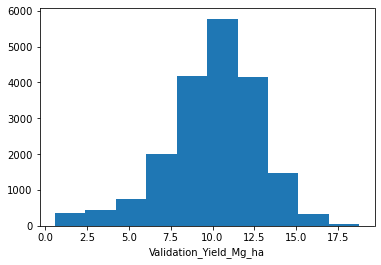

In [137]:
# plt.hist(valid_target.values)
# plt.xlabel("Validation_Yield_Mg_ha")
# plt.show()

612/612 [==============================] - 4s 6ms/step


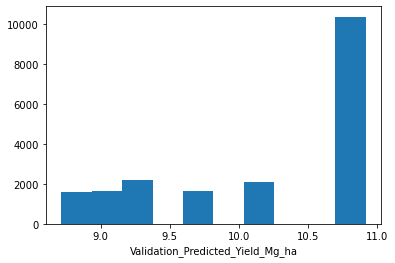

In [177]:
# # plt.hist(modular_model.predict([valid_meta_num, valid_weather_num, valid_EC_num, valid_soil_num, 
#                                             valid_hybrid_num, valid_meta_cat, valid_soil_cat]))
# plt.xlabel("Validation_Predicted_Yield_Mg_ha")
# plt.show()

In [139]:
test_preds = modular_model.predict([test_meta_num, test_weather_num, test_EC_num, test_soil_num, 
                                            test_hybrid_num, test_meta_cat, test_soil_cat])

362/362 [==============================] - 3s 7ms/step


In [140]:
# test_data

In [141]:
test_order = test_data[["Env", "Hybrid"]].values

In [142]:
test_order_df = test_order.copy()

In [143]:
test_preds.shape

(11555, 1)

In [144]:
test_order_df.shape

(11555, 2)

In [145]:
test_order_df = pd.DataFrame(test_order_df)

In [146]:
test_order_df.columns = ["Env", "Hybrid"]

In [147]:
test_order_df["Yield_Mg_ha"] = test_preds

In [148]:
# test_order_df

In [149]:
final_df = test_order_df.groupby(["Env", "Hybrid"])["Yield_Mg_ha"].mean()

In [150]:
final_df = final_df.reset_index()

In [151]:
final_df.head(5)

,Env,Hybrid,Yield_Mg_ha
0,DEH1_2022,B14A/OH43,9.045791
1,DEH1_2022,B37/H95,9.045791
2,DEH1_2022,B73/MO17,9.045791
3,DEH1_2022,B73/PHN82,9.045791
4,DEH1_2022,B73/TX779,9.045794


In [152]:
import matplotlib.pyplot as plt

(array([ 359., 1887.,  794.,    0., 2108.,    0., 1229.,    0.,    0.,
        5178.]),
 array([ 8.714603,  8.93488 ,  9.155158,  9.375435,  9.595712,  9.815989,
        10.036266, 10.256543, 10.47682 , 10.697098, 10.917375],
       dtype=float32),
 <BarContainer object of 10 artists>)

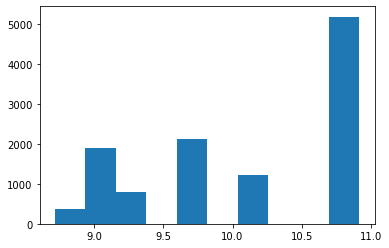

In [153]:
plt.hist(final_df["Yield_Mg_ha"].values)

In [154]:
sub_file = pd.read_csv(r"Testing_Data\1_Submission_Template_2022.csv")

In [155]:
sub_file = sub_file.drop(['Yield_Mg_ha'],1)

C:\Users\vedpi\AppData\Local\Temp\ipykernel_20012\2842506233.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sub_file = sub_file.drop(['Yield_Mg_ha'],1)


In [156]:
sub_file.columns

Index(['Env', 'Hybrid'], dtype='object')

In [157]:
sub_file = sub_file.merge(final_df, on = ["Env", "Hybrid"], how = "left")

In [158]:
sub_file.isnull().sum()

Env            0
Hybrid         0
Yield_Mg_ha    0
dtype: int64

In [159]:
# sub_file.to_csv("last_option_fifth_prediction_deepcropvision.csv", index = False)

In [160]:
sub_file.head()

,Env,Hybrid,Yield_Mg_ha
0,DEH1_2022,B14A/OH43,9.045791
1,DEH1_2022,B37/H95,9.045791
2,DEH1_2022,B73/MO17,9.045791
3,DEH1_2022,B73/PHN82,9.045791
4,DEH1_2022,B73/TX779,9.045794


In [161]:
sub_file.shape

(11555, 3)

In [162]:
sub_file.head()

,Env,Hybrid,Yield_Mg_ha
0,DEH1_2022,B14A/OH43,9.045791
1,DEH1_2022,B37/H95,9.045791
2,DEH1_2022,B73/MO17,9.045791
3,DEH1_2022,B73/PHN82,9.045791
4,DEH1_2022,B73/TX779,9.045794


In [163]:
sub_file.dtypes

Env             object
Hybrid          object
Yield_Mg_ha    float32
dtype: object

In [164]:
# train_trait = pd.read_csv(r"Training_Data\1_Training_Trait_Data_2014_2021.csv")

In [165]:
# plt.hist(train_trait["Yield_Mg_ha"])
# plt.show()

In [166]:
# plt.hist(sub_file["Yield_Mg_ha"])
# plt.show()

In [167]:
# sub_file_ck = pd.read_csv(r"Testing_Data\1_Submission_Template_2022.csv")

In [168]:
# sub_file_ck.head()

In [169]:
# train_trait.head()

In [170]:
final_observed = pd.read_csv("D:\Maize_Comp\Final_Observed_Yield.csv")

In [171]:
final_observed.dtypes

Env             object
Hybrid          object
Yield_Mg_ha    float64
dtype: object

In [172]:
c1 = final_observed.merge(sub_file, on = ["Env", "Hybrid"])

In [173]:
c1

,Env,Hybrid,Yield_Mg_ha_x,Yield_Mg_ha_y
0,DEH1_2022,B14A/OH43,8.999079,9.045791
1,DEH1_2022,B37/H95,11.079448,9.045791
2,DEH1_2022,B73/MO17,10.513658,9.045791
3,DEH1_2022,B73/PHN82,13.254995,9.045791
4,DEH1_2022,B73/TX779,10.345387,9.045794
...,...,...,...,...
10285,WIH3_2022,W10010_0337/LH244,11.975018,9.045794
10286,WIH3_2022,W10010_0346/LH244,12.971193,9.045794
10287,WIH3_2022,W10010_0358/LH244,13.499769,9.045794
10288,WIH3_2022,W10010_0381/LH244,10.831640,9.045794


In [174]:
# check final test set rmse

In [175]:
import numpy as np

In [176]:
np.sqrt(((c1.iloc[:,-1] - c1.iloc[:,-2])**2).mean())

2.87637082594875